<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 157.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 158.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 116.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 127.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 131.7 MB/s eta 0:00:00


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


--- Top 15 Industries by Respondent Count ---
Industry
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Higher Education                                890
Transportation, or Supply Chain                 859
Computer Systems Design and Services            844
Energy                                          578
Insurance                                       389
Name: count, dtype: int64
--------------------------------------------------

Displaying horizontal bar chart for visualization...


/tmp/ipykernel_300/1593244774.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


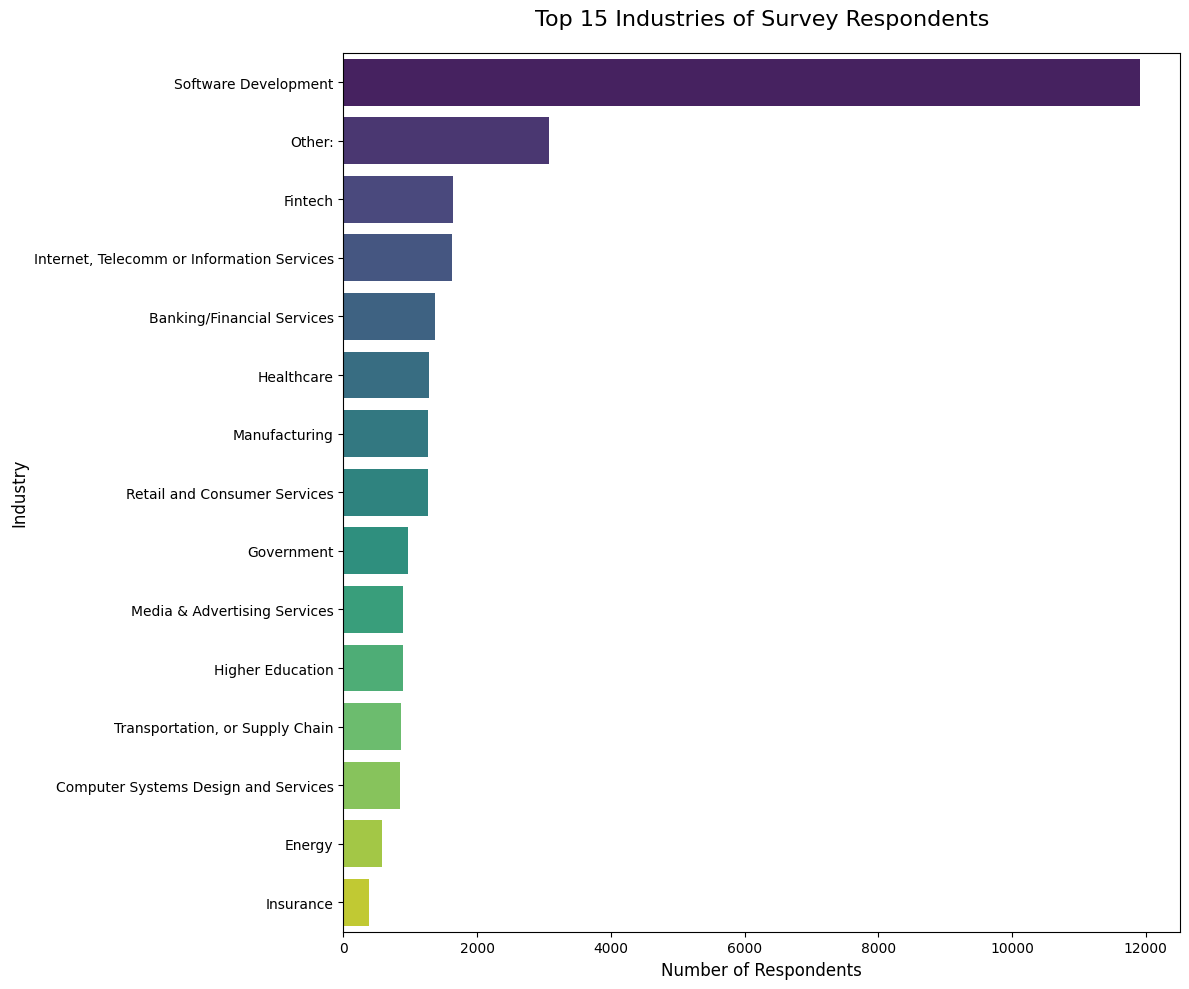

In [4]:
##Write your code here
try:
    # Attempt to load the dataset.
    df = pd.read_csv(file_url)

    # --- Data Preparation ---
    # Drop rows where 'Industry' is not specified to ensure clean data.
    df_industry = df.dropna(subset=['Industry'])

    # --- Frequency Count ---
    # Get the value counts for the 'Industry' column.
    industry_counts = df_industry['Industry'].value_counts()

    # To make the chart readable, we'll focus on the top 15 industries.
    top_n = 15
    top_industries = industry_counts.nlargest(top_n)

    print(f"--- Top {top_n} Industries by Respondent Count ---")
    print(top_industries)
    print("-" * 50)


    # --- Visualization (Horizontal Bar Chart) ---
    # A horizontal bar chart is a good choice here because some industry names can be long.
    plt.figure(figsize=(12, 10))
    sns.barplot(
        x=top_industries.values,
        y=top_industries.index,
        palette='viridis',
        orient='h' # Specify horizontal orientation
    )

    # Set titles and labels for clarity
    plt.title(f'Top {top_n} Industries of Survey Respondents', fontsize=16, pad=20)
    plt.xlabel('Number of Respondents', fontsize=12)
    plt.ylabel('Industry', fontsize=12)

    # Adjust layout to prevent labels from being cut off
    plt.tight_layout()

    print("\nDisplaying horizontal bar chart for visualization...")
    plt.show()


except FileNotFoundError:
    print("\nError: The file 'survey_results_public.csv' was not found.")
    print("Please ensure the dataset file is in the correct directory and try again.")
except KeyError:
    print("\nError: 'Industry' column not found in the dataset.")
    print("Please check the column names in your CSV file.")



<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


--- Yearly Compensation Statistics ---
Mean: $86,155.29
Median: $65,000.00
Standard Deviation: $186,756.97
Outlier Threshold (Mean + 3*SD): $646,426.21
----------------------------------------
Found 89 respondents with compensation above the threshold.
--- High-Earning Respondents (Outliers) ---
            Country YearsCodePro  \
15837      Ethiopia            5   
12723  South Africa           10   
28379        Taiwan            7   
17593        Brazil           13   
17672       Ukraine           11   
19267         India            7   
23694      Pakistan            5   
33720        Brazil            5   
34523      Pakistan            2   
13763     Australia           12   

                                               EdLevel  ConvertedCompYearly  
15837     Bachelor’s degree (B.A., B.S., B.Eng., etc.)           16256603.0  
12723   Professional degree (JD, MD, Ph.D, Ed.D, etc.)           13818022.0  
28379   Professional degree (JD, MD, Ph.D, Ed.D, etc.)            900000

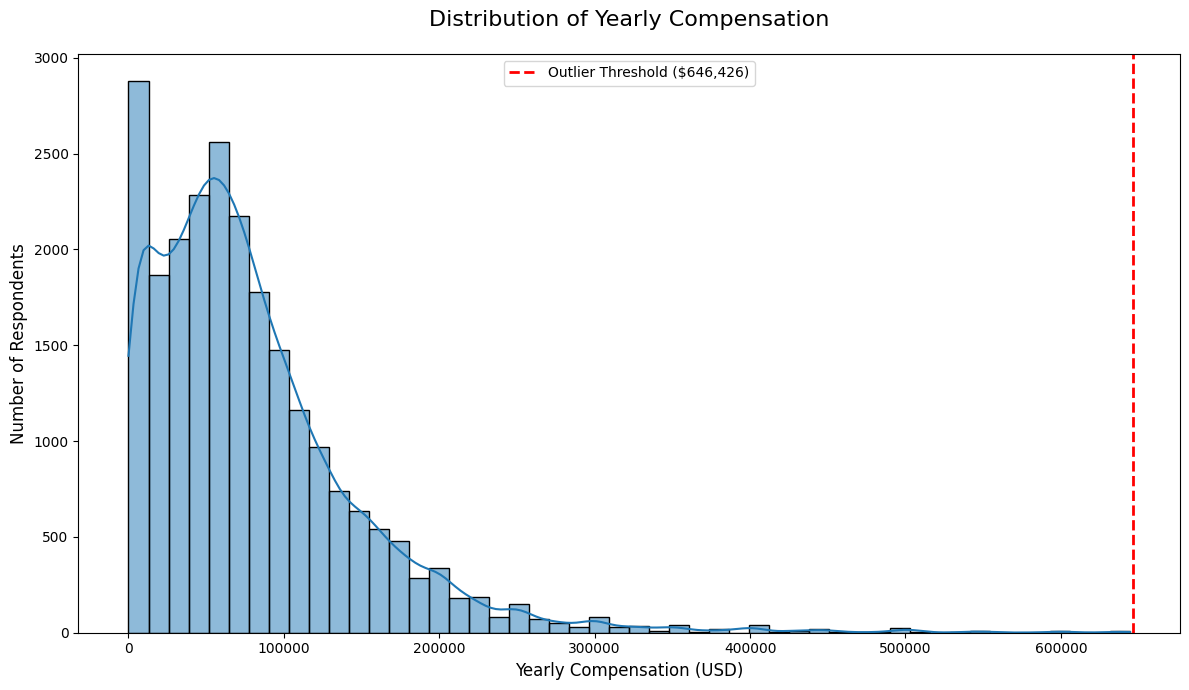

In [5]:
##Write your code here
try:
    # Attempt to load the dataset.
    df = pd.read_csv(file_url)

    # --- Data Preparation ---
    # Select the compensation column and drop missing values for accurate calculations.
    comp_data = df['ConvertedCompYearly'].dropna()

    # --- Statistical Calculation ---
    # Calculate the mean, median, and standard deviation.
    mean_comp = comp_data.mean()
    median_comp = comp_data.median()
    std_comp = comp_data.std()

    # Define the threshold for identifying outliers.
    # A common method is to use 3 standard deviations from the mean.
    outlier_threshold = mean_comp + (3 * std_comp)

    print("--- Yearly Compensation Statistics ---")
    print(f"Mean: ${mean_comp:,.2f}")
    print(f"Median: ${median_comp:,.2f}")
    print(f"Standard Deviation: ${std_comp:,.2f}")
    print(f"Outlier Threshold (Mean + 3*SD): ${outlier_threshold:,.2f}")
    print("-" * 40)

    # --- Identify Outliers ---
    # Filter the original DataFrame to find respondents who exceed the threshold.
    outliers_df = df[df['ConvertedCompYearly'] > outlier_threshold]

    print(f"Found {len(outliers_df)} respondents with compensation above the threshold.")
    if not outliers_df.empty:
        # Display some information about the outliers found.
        print("--- High-Earning Respondents (Outliers) ---")
        print(outliers_df[['Country', 'YearsCodePro', 'EdLevel', 'ConvertedCompYearly']].sort_values(by='ConvertedCompYearly', ascending=False).head(10))


    # --- Visualization (Histogram with Outlier Threshold) ---
    plt.figure(figsize=(12, 7))
    # Plot a histogram of the compensation data.
    # We'll filter the data for the plot to make the distribution more visible,
    # as outliers can skew the x-axis dramatically.
    sns.histplot(comp_data[comp_data < outlier_threshold], bins=50, kde=True)

    # Add a vertical line to show the outlier threshold.
    plt.axvline(outlier_threshold, color='r', linestyle='--', linewidth=2, label=f'Outlier Threshold (${outlier_threshold:,.0f})')

    plt.title('Distribution of Yearly Compensation', fontsize=16, pad=20)
    plt.xlabel('Yearly Compensation (USD)', fontsize=12)
    plt.ylabel('Number of Respondents', fontsize=12)
    plt.legend()
    plt.ticklabel_format(style='plain', axis='x') # Prevent scientific notation on x-axis

    plt.tight_layout()
    print("\nDisplaying histogram for visualization...")
    plt.show()


except FileNotFoundError:
    print("\nError: The file 'survey_results_public.csv' was not found.")
    print("Please ensure the dataset file is in the correct directory and try again.")
except KeyError:
    print("\nError: 'ConvertedCompYearly' column not found in the dataset.")
    print("Please check the column names in your CSV file.")



<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


--- Yearly Compensation Statistics (IQR Method) ---
First Quartile (Q1): $32,712.00
Third Quartile (Q3): $107,971.50
Interquartile Range (IQR): $75,259.50
Outlier Upper Bound: $220,860.75
--------------------------------------------------
Found 978 respondents with compensation above the IQR upper bound.
--- High-Earning Respondents (Outliers) ---
            Country YearsCodePro  \
15837      Ethiopia            5   
12723  South Africa           10   
28379        Taiwan            7   
17593        Brazil           13   
17672       Ukraine           11   
19267         India            7   
23694      Pakistan            5   
33720        Brazil            5   
34523      Pakistan            2   
13763     Australia           12   

                                               EdLevel  ConvertedCompYearly  
15837     Bachelor’s degree (B.A., B.S., B.Eng., etc.)           16256603.0  
12723   Professional degree (JD, MD, Ph.D, Ed.D, etc.)           13818022.0  
28379   Professiona

/tmp/ipykernel_300/2312555912.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=comp_data, palette='viridis')



Displaying box plot for visualization...


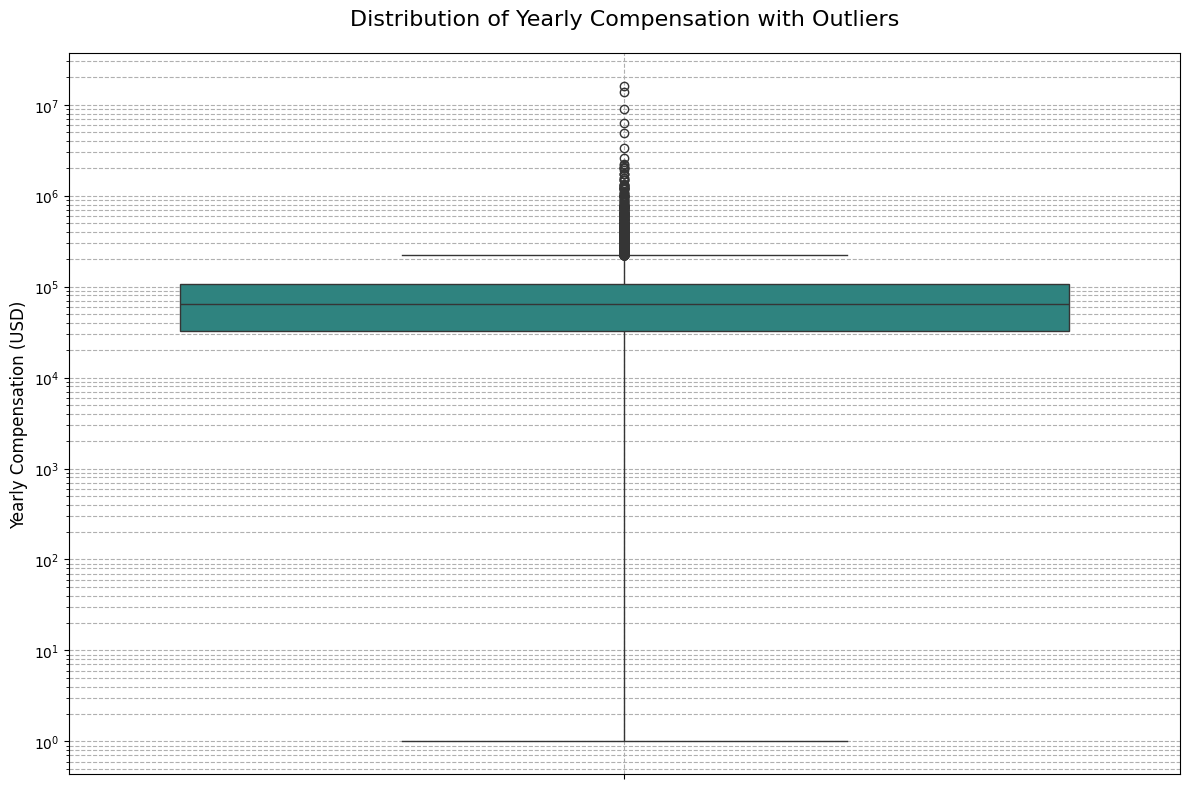

In [6]:
##Write your code here
try:
    # Attempt to load the dataset.
    df = pd.read_csv(file_url)

    # --- Data Preparation ---
    # Select the compensation column and drop missing values for accurate calculations.
    comp_data = df['ConvertedCompYearly'].dropna()

    # --- Statistical Calculation (IQR Method) ---
    # Calculate the first quartile (Q1), third quartile (Q3), and the IQR.
    Q1 = comp_data.quantile(0.25)
    Q3 = comp_data.quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for identifying outliers.
    # An outlier is typically defined as a value outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR.
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print("--- Yearly Compensation Statistics (IQR Method) ---")
    print(f"First Quartile (Q1): ${Q1:,.2f}")
    print(f"Third Quartile (Q3): ${Q3:,.2f}")
    print(f"Interquartile Range (IQR): ${IQR:,.2f}")
    print(f"Outlier Upper Bound: ${upper_bound:,.2f}")
    print("-" * 50)

    # --- Identify Outliers ---
    # Filter the original DataFrame to find respondents whose compensation is above the upper bound.
    outliers_df = df[df['ConvertedCompYearly'] > upper_bound]

    print(f"Found {len(outliers_df)} respondents with compensation above the IQR upper bound.")
    if not outliers_df.empty:
        # Display some information about the outliers found.
        print("--- High-Earning Respondents (Outliers) ---")
        print(outliers_df[['Country', 'YearsCodePro', 'EdLevel', 'ConvertedCompYearly']].sort_values(by='ConvertedCompYearly', ascending=False).head(10))


    # --- Visualization (Box Plot) ---
    # A box plot is the standard way to visualize data distribution and outliers based on IQR.
    plt.figure(figsize=(12, 8))
    sns.boxplot(y=comp_data, palette='viridis')

    plt.title('Distribution of Yearly Compensation with Outliers', fontsize=16, pad=20)
    plt.ylabel('Yearly Compensation (USD)', fontsize=12)
    # Using a logarithmic scale can help to better visualize the distribution
    # when there is a wide range of values and many outliers.
    plt.yscale('log')
    plt.grid(True, which="both", ls="--")

    plt.tight_layout()
    print("\nDisplaying box plot for visualization...")
    plt.show()


except FileNotFoundError:
    print("\nError: The file 'survey_results_public.csv' was not found.")
    print("Please ensure the dataset file is in the correct directory and try again.")
except KeyError:
    print("\nError: 'ConvertedCompYearly' column not found in the dataset.")
    print("Please check the column names in your CSV file.")



<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


--- Yearly Compensation Statistics (IQR Method) ---
First Quartile (Q1): $32,712.00
Third Quartile (Q3): $107,971.50
Interquartile Range (IQR): $75,259.50
Outlier Upper Bound: $220,860.75
--------------------------------------------------
Found 978 respondents with compensation above the IQR upper bound.

--- DataFrame Validation ---
Original DataFrame size (with NaNs in comp): 65437
Original compensation data size (non-NaN): 23435
New DataFrame size (outliers removed): 22457
Number of outliers removed: 978
--------------------------------------------------

Displaying box plot for visualization (outliers removed)...


/tmp/ipykernel_300/2227971435.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_no_outliers['ConvertedCompYearly'], palette='viridis')


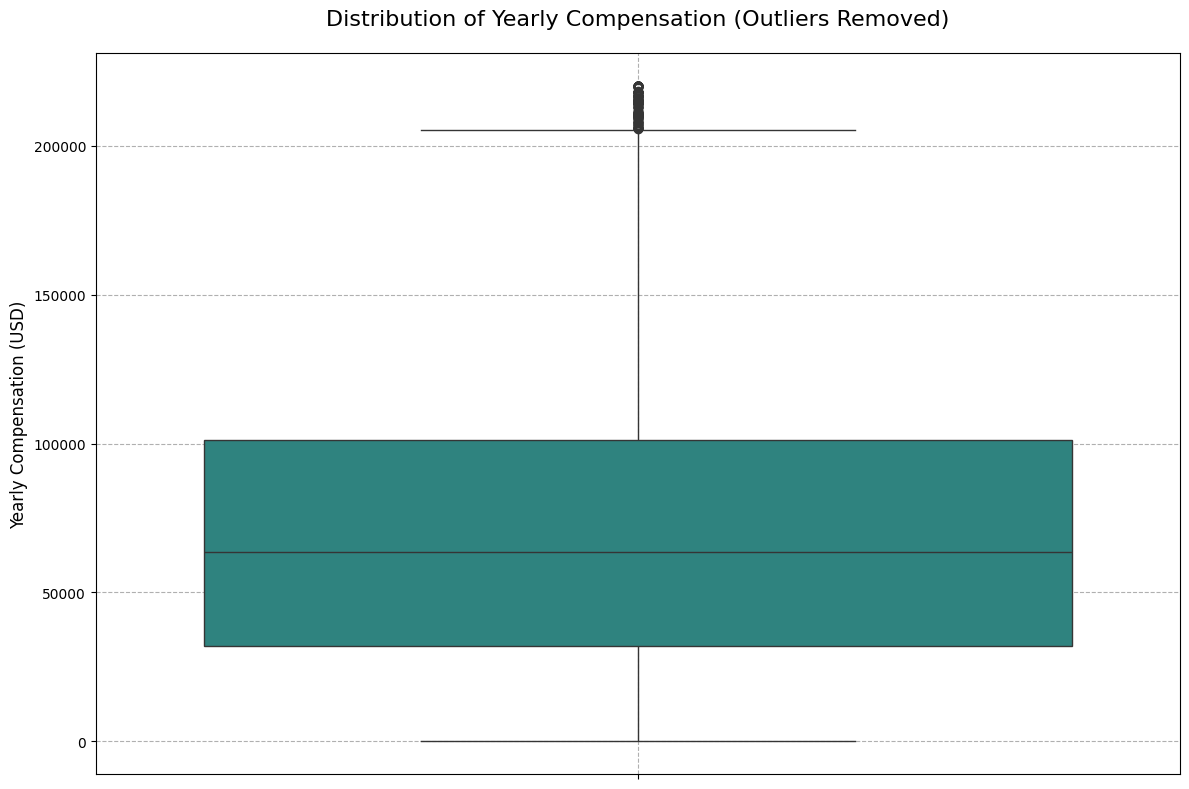

In [7]:
##Write your code here
try:
    # Attempt to load the dataset.
    df = pd.read_csv(file_url)

    # --- Data Preparation ---
    # Select the compensation column and drop missing values for accurate calculations.
    comp_data = df['ConvertedCompYearly'].dropna()

    # --- Statistical Calculation (IQR Method) ---
    # Calculate the first quartile (Q1), third quartile (Q3), and the IQR.
    Q1 = comp_data.quantile(0.25)
    Q3 = comp_data.quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for identifying outliers.
    # An outlier is typically defined as a value outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR.
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print("--- Yearly Compensation Statistics (IQR Method) ---")
    print(f"First Quartile (Q1): ${Q1:,.2f}")
    print(f"Third Quartile (Q3): ${Q3:,.2f}")
    print(f"Interquartile Range (IQR): ${IQR:,.2f}")
    print(f"Outlier Upper Bound: ${upper_bound:,.2f}")
    print("-" * 50)

    # --- Identify and Remove Outliers ---
    # Filter to find outliers first for reporting purposes.
    outliers_df = df[df['ConvertedCompYearly'] > upper_bound]
    print(f"Found {len(outliers_df)} respondents with compensation above the IQR upper bound.")

    # Create a new DataFrame that excludes the outliers.
    df_no_outliers = df[df['ConvertedCompYearly'] <= upper_bound]
    
    # --- Validate New DataFrame ---
    print("\n--- DataFrame Validation ---")
    print(f"Original DataFrame size (with NaNs in comp): {len(df)}")
    print(f"Original compensation data size (non-NaN): {len(comp_data)}")
    print(f"New DataFrame size (outliers removed): {len(df_no_outliers)}")
    print(f"Number of outliers removed: {len(outliers_df)}")
    print("-" * 50)


    # --- Visualization (Box Plot of Data Without Outliers) ---
    # This box plot shows the distribution of the cleaned data.
    plt.figure(figsize=(12, 8))
    sns.boxplot(y=df_no_outliers['ConvertedCompYearly'], palette='viridis')

    plt.title('Distribution of Yearly Compensation (Outliers Removed)', fontsize=16, pad=20)
    plt.ylabel('Yearly Compensation (USD)', fontsize=12)
    # The y-scale is no longer logarithmic as the extreme outliers are removed.
    plt.grid(True, which="both", ls="--")

    plt.tight_layout()
    print("\nDisplaying box plot for visualization (outliers removed)...")
    plt.show()


except FileNotFoundError:
    print("\nError: The file 'survey_results_public.csv' was not found.")
    print("Please ensure the dataset file is in the correct directory and try again.")
except KeyError:
    print("\nError: 'ConvertedCompYearly' column not found in the dataset.")
    print("Please check the column names in your CSV file.")



<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


--- Correlation Matrix ---
                      Age_Num  YearsCodePro  ConvertedCompYearly
Age_Num              1.000000      0.824346             0.122149
YearsCodePro         0.824346      1.000000             0.141039
ConvertedCompYearly  0.122149      0.141039             1.000000
--------------------------------------------------

Displaying correlation heatmap...


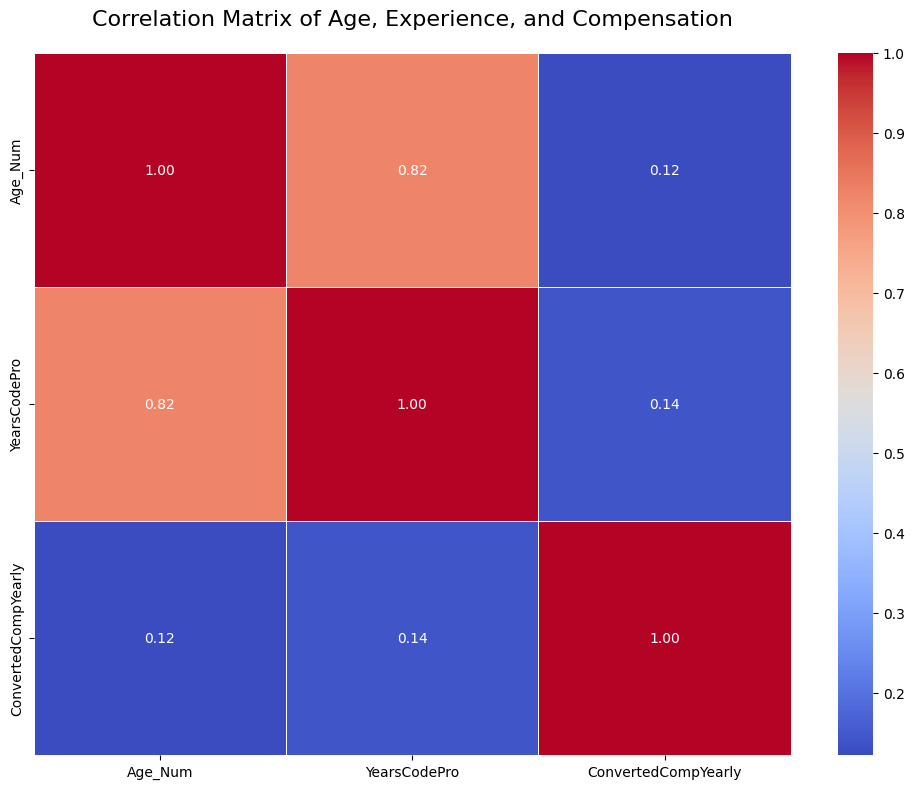

In [9]:
##Write your code here
try:
    # Attempt to load the dataset.
    df = pd.read_csv(file_url)

    # --- Data Preparation ---
    # 1. Map the categorical 'Age' column to approximate numerical values (midpoints).
    age_mapping = {
        'Under 18 years old': 17,
        '18-24 years old': 21,
        '25-34 years old': 30,
        '35-44 years old': 40,
        '45-54 years old': 50,
        '55-64 years old': 60,
        '65 years or older': 70,
        'Prefer not to say': None # Exclude this category
    }
    df['Age_Num'] = df['Age'].map(age_mapping)

    # 2. Convert 'YearsCodePro' to a numeric type
    df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'].replace({
        'Less than 1 year': 0,
        'More than 50 years': 51
    }), errors='coerce')
    
    # 3. Select relevant numerical columns for correlation analysis
    numeric_cols = ['Age_Num', 'YearsCodePro', 'ConvertedCompYearly']
    df_numeric = df[numeric_cols].copy()

    # 4. Drop rows with any missing values in these columns for accurate correlation
    df_cleaned = df_numeric.dropna()

    # --- Correlation Calculation ---
    # Compute the Pearson correlation matrix for the selected columns.
    correlation_matrix = df_cleaned.corr()

    print("--- Correlation Matrix ---")
    print(correlation_matrix)
    print("-" * 50)


    # --- Visualization (Heatmap) ---
    # A heatmap is an excellent way to visualize a correlation matrix.
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,       # Display the correlation values on the heatmap
        cmap='coolwarm',  # Use a diverging colormap
        fmt=".2f",        # Format annotations to two decimal places
        linewidths=.5
    )

    # Set titles and labels
    plt.title('Correlation Matrix of Age, Experience, and Compensation', fontsize=16, pad=20)
    
    plt.tight_layout()
    print("\nDisplaying correlation heatmap...")
    plt.show()


except FileNotFoundError:
    print("\nError: The file 'survey_results_public.csv' was not found.")
    print("Please ensure the dataset file is in the correct directory and try again.")
except KeyError as e:
    print(f"\nError: Column not found in the dataset: {e}")
    print("Please check the column names in your CSV file.")



<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
